In [1]:
pip install -U scikit-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


# Assignment 1: SLR Delivery Time

Predict delivery time using sorting time 

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [35]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [36]:
delivery=pd.read_csv("delivery_time.csv")
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [37]:
delivery.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [39]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [38]:
delivery.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [41]:
#Renaming column headers and removing spaces from the column names

delivery=delivery.rename({'Delivery Time':'DT','Sorting Time':'ST'},axis=1,)


Text(0, 0.5, 'Sorting Time')

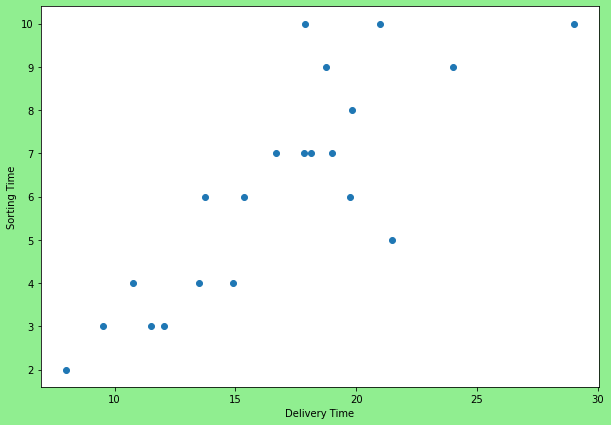

In [42]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(delivery.DT,delivery.ST,);
plt.xlabel("Delivery Time");
plt.ylabel("Sorting Time")

In [43]:
delivery.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


In [44]:
delivery.shape

(21, 2)

# Building the model with statsmodels

In [46]:
model1=smf.ols("DT~ST",delivery).fit()
model1

In [47]:
model1.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [48]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           3.98e-06
Time:                        00:34:55   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
import seaborn as sns

<AxesSubplot:xlabel='ST', ylabel='DT'>

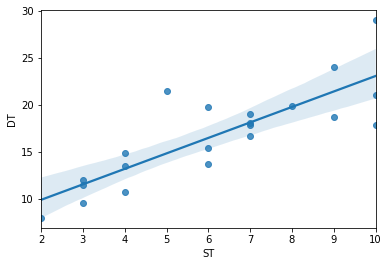

In [50]:
sns.regplot(x=delivery['ST'],y=delivery['DT'])

In [51]:
model1.rsquared , model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Predictions
Model : Y = b+ ax

DT= 6.5827 + 1.6490 * ST

In [52]:
#Using the First Model predict Delivery Time for Sorting Time (ST) = 4

DT = (6.582734) + (1.649020)*(4)
DT

13.178814

# Assignment 2: SLR Salary Hike

Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [53]:
data=pd.read_csv("Salary_Data.csv")

In [54]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Text(0, 0.5, 'Salary')

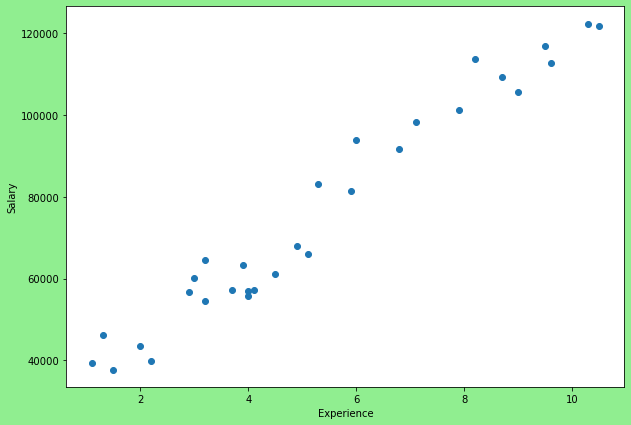

In [56]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(data.YearsExperience,data.Salary,);
plt.xlabel("Experience");
plt.ylabel("Salary")

In [57]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [59]:
#very high between Salary and Years of experience
#linear regression can be applied

In [60]:
#Creating a model to predict Salary depending on Years of Experience

salary_model=smf.ols("Salary~YearsExperience",data).fit()
salary_model

In [61]:
salary_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           1.14e-20
Time:                        00:42:33   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
salary_model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

C:\Users\mukes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

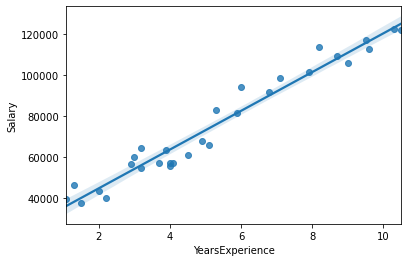

In [63]:
sns.regplot(data['YearsExperience'],data['Salary'])

In [65]:
salary_model.rsquared , salary_model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [66]:
#Since R-Squared and Adjuster R-squared values are more than 0.95, there is no need to further improve the model.

# Predictions
Salary = Intercept + (alpha x YearsExperience)

In [70]:
#Using this model predict Salary for Years of Experience = 3

Salary = (2.579e+04) + (9449.9623)*(3)
Salary

54139.8869